# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis¶

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 22.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
76921,0.1587,0.0195,0.0024,0.0024,0.0024,0.0171,0.0684,0.3101,0.0293,0.0464,1,1,10,10
304210,0.0342,0.0024,0.0024,0.0024,0.0073,0.0879,0.0586,0.0708,0.0073,0.0537,0,0,0,0
192552,0.0024,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0024,0.0415,0.0024,0,0,0,0
185455,0.0879,0.0024,0.0122,0.0171,0.1221,0.3394,0.3882,0.3223,0.6421,0.1855,9,9,10,10
214756,0.1636,0.0122,0.0122,0.0635,0.0024,0.0488,0.6787,0.1978,0.0391,0.2930,4,4,14,14


In [3]:
raw_data.shape

(468122, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468122 entries, 0 to 468121
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          468122 non-null  float64
 1   Emg2          468122 non-null  float64
 2   Emg3          468122 non-null  float64
 3   Emg4          468122 non-null  float64
 4   Emg5          468122 non-null  float64
 5   Emg6          468122 non-null  float64
 6   Emg7          468122 non-null  float64
 7   Emg8          468122 non-null  float64
 8   Emg9          468122 non-null  float64
 9   Emg10         468122 non-null  float64
 10  repetition    468122 non-null  int64  
 11  rerepetition  468122 non-null  int64  
 12  stimulus      468122 non-null  int64  
 13  restimulus    468122 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.0 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,468122.000000,468122.000000,468122.000000,468122.000000,468122.000000,468122.000000,468122.000000,468122.000000,468122.000000,468122.000000,468122.000000,468122.000000,468122.000000,468122.000000
mean,0.147829,0.045038,0.046509,0.059677,0.041971,0.163647,0.318662,0.251931,0.069318,0.165755,3.171002,2.399259,5.617892,4.282864
std,0.224640,0.098812,0.115883,0.142531,0.087394,0.293843,0.445182,0.342322,0.102326,0.235296,3.484690,3.321378,6.579863,6.277879
min,0.000000,0.000000,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.009800,0.002400,0.002400,0.002400,0.002400,0.039100,0.024400,0.024400,0.024400,0.004900,0.000000,0.000000,0.000000,0.000000
50%,0.068400,0.002400,0.002400,0.002400,0.009800,0.095200,0.146500,0.114700,0.043900,0.075700,2.000000,0.000000,3.000000,0.000000
75%,0.192900,0.034200,0.034200,0.051300,0.043900,0.173300,0.434600,0.349100,0.073200,0.236800,6.000000,5.000000,10.000000,8.000000
max,3.286100,1.491700,2.517100,2.272900,1.001000,4.221200,4.660600,4.663100,2.624500,2.893100,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     198261
4      15624
8      15624
2      15612
12     15604
7      15602
6      15583
9      15570
11     15567
5      15565
3      15537
1      15528
10     15527
13     10388
17     10384
14     10378
15     10346
16     10331
18      5201
19      5200
21      5198
22      5170
20      5162
23      5160
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

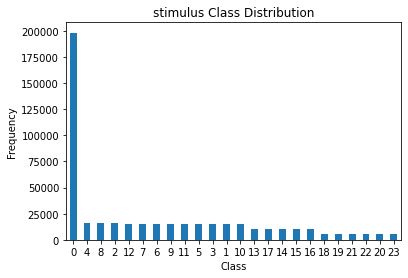

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
110181,0.3052,0.0269,0.0024,0.0024,0.0244,0.1563,0.0439,0.1343,0.0244,0.0293,10,10,1,1
430598,0.0293,0.0024,0.0024,0.0024,0.0098,0.1025,0.0024,0.0024,0.0537,0.0024,0,0,0,0
70126,0.3833,0.0488,0.0073,0.0269,0.0049,0.0269,0.2124,0.7300,0.0317,0.0952,3,3,9,9
47750,0.1855,0.0269,0.0366,0.1782,0.0146,0.1465,1.7505,0.3345,0.0439,0.4736,7,7,6,6
321129,0.3931,0.0024,0.0781,0.0610,0.0635,0.3345,0.6641,0.1343,0.0952,0.2417,9,9,8,8


In [12]:
raw_data.shape

(391184, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391184 entries, 0 to 468121
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          391184 non-null  float64
 1   Emg2          391184 non-null  float64
 2   Emg3          391184 non-null  float64
 3   Emg4          391184 non-null  float64
 4   Emg5          391184 non-null  float64
 5   Emg6          391184 non-null  float64
 6   Emg7          391184 non-null  float64
 7   Emg8          391184 non-null  float64
 8   Emg9          391184 non-null  float64
 9   Emg10         391184 non-null  float64
 10  repetition    391184 non-null  int64  
 11  rerepetition  391184 non-null  int64  
 12  stimulus      391184 non-null  int64  
 13  restimulus    391184 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 44.8 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

In [16]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)

# Machine Learning Models

# Decision Tree

In [17]:
from sklearn import tree
tree = tree.DecisionTreeClassifier(ccp_alpha= 0.0,
              class_weight= None,
              criterion = "entropy",
              max_depth = None,
              max_features = None,
              max_leaf_nodes = None,
              min_impurity_decrease = 0.0,
              min_samples_leaf = 1,
              min_samples_split = 2,
              min_weight_fraction_leaf = 0.0,
              random_state = None,
              splitter = 'best')
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [18]:
y_pred1 = tree.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 86.70450042818615


Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     38515
           1       0.82      0.82      0.82      2230
           2       0.80      0.80      0.80      2492
           3       0.75      0.78      0.77      2287
           4       0.79      0.78      0.78      2382
           5       0.78      0.79      0.78      2085
           6       0.85      0.84      0.84      2100
           7       0.80      0.79      0.80      2214
           8       0.76      0.77      0.77      2027
           9       0.79      0.78      0.78      2459
          10       0.77      0.80      0.78      2065
          11       0.76      0.75      0.76      2165
          12       0.79      0.78      0.79      2444
          13       0.77      0.75      0.76      1593
          14       0.74      0.77      0.76      1568
          15       0.80      0.80      0.80      1629
          16       0.82      0.82      0.82      1641
 

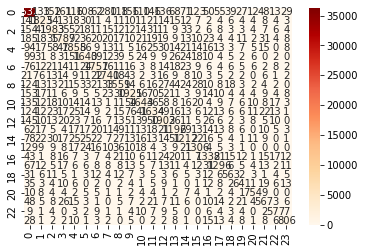

In [20]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [21]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 0.9569640962715851
MSE: 10.561626851745338
RMSE: 3.2498656667230628


In [22]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.8671532202165817
Recall Score :  0.8670450042818615
f1_score :  0.8670564066069933


# KNeighborsClassifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier(algorithm = 'ball_tree',
                                            leaf_size = 30,
                                            metric = 'minkowski',
                                            metric_params= None,
                                            n_jobs = -1,
                                            n_neighbors = 2,
                                            p = 1,
                                            weights = 'distance')
KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_jobs=-1, n_neighbors=2, p=1,
                     weights='distance')

In [24]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 95.37558955481423


Classification report : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     38515
           1       0.95      0.94      0.95      2230
           2       0.97      0.96      0.96      2492
           3       0.94      0.91      0.92      2287
           4       0.95      0.94      0.94      2382
           5       0.95      0.93      0.94      2085
           6       0.96      0.95      0.95      2100
           7       0.90      0.89      0.89      2214
           8       0.93      0.93      0.93      2027
           9       0.93      0.92      0.92      2459
          10       0.92      0.91      0.92      2065
          11       0.93      0.91      0.92      2165
          12       0.93      0.93      0.93      2444
          13       0.95      0.93      0.94      1593
          14       0.93      0.91      0.92      1568
          15       0.92      0.90      0.91      1629
          16       0.97      0.97      0.97      1641
 

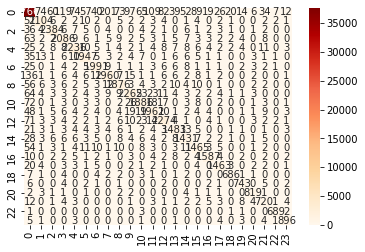

In [26]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [27]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 0.3540524304357273
MSE: 3.9374209133785802
RMSE: 1.9842935552429182


In [28]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.9535834382291654
Recall Score :  0.9537558955481422
f1_score :  0.9536184604888038


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier(
              bootstrap = True,
              ccp_alpha = 0.0,
              class_weight =  None,
              criterion = 'entropy',
              max_depth = None,
              max_features = 'auto' ,
              max_leaf_nodes = None,
              max_samples = None,
              min_impurity_decrease = 0.0,
              min_samples_leaf = 1,
              min_samples_split = 2,
              min_weight_fraction_leaf = 0.0,
              n_estimators = 400,
              n_jobs = None,
              oob_score = False,
              random_state = None,
              verbose = 0,
              warm_start = False)
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=400)

In [30]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 94.47320321586973


Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96     38515
           1       0.96      0.91      0.93      2230
           2       0.95      0.91      0.93      2492
           3       0.96      0.88      0.92      2287
           4       0.96      0.88      0.92      2382
           5       0.96      0.90      0.93      2085
           6       0.97      0.92      0.94      2100
           7       0.94      0.84      0.89      2214
           8       0.93      0.89      0.91      2027
           9       0.92      0.90      0.91      2459
          10       0.95      0.89      0.92      2065
          11       0.96      0.86      0.91      2165
          12       0.96      0.90      0.93      2444
          13       0.97      0.88      0.92      1593
          14       0.91      0.90      0.91      1568
          15       0.92      0.89      0.90      1629
          16       0.96      0.94      0.95      1641
 

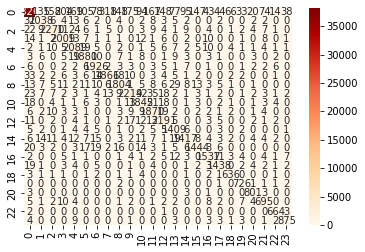

In [32]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [33]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 0.43368227309329344
MSE: 5.106867594616358
RMSE: 2.2598379576014644


In [34]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.9452764381478109
Recall Score :  0.9447320321586973
f1_score :  0.9440876374122968


# XGBoost

In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier(base_score = None,
              booster = 'gbtree',
              colsample_bylevel = None,
              colsample_bynode = None,
              colsample_bytree = None,
              enable_categorical = False,
              gamma = 0,
              gpu_id = None,
              importance_typen = None,
              interaction_constraints = None,
              learning_rate = 0.5,
              max_delta_step = None,
              max_depth = 50,
              min_child_weight = 1,
              monotone_constraints = None,
              n_estimators = 400,
              n_jobs = None,
              num_parallel_tree = None,
              objective = 'multi:softmax',
              predictor = 'gpu_predictor',
              random_state = None,
              reg_alpha = None,
              reg_lambda = None,
              scale_pos_weight = None,
              subsample = None,
              tree_method = None,
              use_label_encoder = True,
              validate_parameters = None,
              verbosity = None)
xgb.fit(X_train, y_train)

E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIn

[14:54:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None, importance_typen=None,
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=50, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob',
              predictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
y_pred4 = xgb.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 94.17155565780897


Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     38515
           1       0.93      0.91      0.92      2230
           2       0.92      0.91      0.92      2492
           3       0.94      0.89      0.91      2287
           4       0.93      0.89      0.91      2382
           5       0.94      0.90      0.92      2085
           6       0.96      0.92      0.94      2100
           7       0.92      0.86      0.89      2214
           8       0.91      0.90      0.91      2027
           9       0.91      0.90      0.90      2459
          10       0.92      0.89      0.91      2065
          11       0.92      0.87      0.89      2165
          12       0.94      0.89      0.92      2444
          13       0.93      0.87      0.90      1593
          14       0.88      0.89      0.89      1568
          15       0.91      0.89      0.90      1629
          16       0.95      0.93      0.94      1641
 

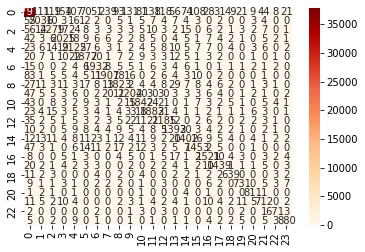

In [38]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [39]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 0.4231885169421118
MSE: 4.7355982463540265
RMSE: 2.176142974704104


In [40]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.9413920296720937
Recall Score :  0.9417155565780897
f1_score :  0.9412680230202717


# ExtraTreesClassifier

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier(bootstrap = False,
             ccp_alpha = 0.0,
             class_weight = None,
             criterion = 'entropy',
             max_depth = None,
             max_features = 'auto',
             max_leaf_nodes = None,
             max_samples = None,
             min_impurity_decrease = 0.0,
             min_samples_leaf = 1,
             min_samples_split = 2,
             min_weight_fraction_leaf = 0.0,
             n_estimators = 400,
             n_jobs = None,
             oob_score = False,
             random_state = None,
             verbose = 0,
             warm_start = False)
extratree.fit(X_train, y_train)

ExtraTreesClassifier(criterion='entropy', n_estimators=400)

In [42]:
y_pred5 = extratree.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 94.96018507867122


Classification report : 
               precision    recall  f1-score   support

           0       0.94      1.00      0.96     38515
           1       0.97      0.92      0.94      2230
           2       0.97      0.92      0.94      2492
           3       0.97      0.89      0.93      2287
           4       0.97      0.89      0.93      2382
           5       0.97      0.91      0.94      2085
           6       0.98      0.92      0.95      2100
           7       0.95      0.84      0.89      2214
           8       0.95      0.90      0.92      2027
           9       0.94      0.91      0.93      2459
          10       0.96      0.91      0.93      2065
          11       0.97      0.87      0.92      2165
          12       0.98      0.91      0.94      2444
          13       0.98      0.90      0.94      1593
          14       0.93      0.91      0.92      1568
          15       0.93      0.88      0.91      1629
          16       0.97      0.94      0.95      1641
 

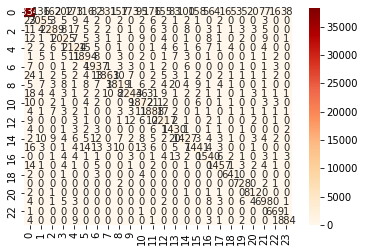

In [44]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [45]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 0.41080307271495586
MSE: 4.925751243018009
RMSE: 2.2194033529347497


In [46]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.950592727406934
Recall Score :  0.9496018507867122
f1_score :  0.9490525239752549
